In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Individuals Probability: [([('000', '110'), ('010', '111'), ('001', '100'), ('010', '100'), ('100', '110'), ('110', '110'), ('001', '001'), ('011', '011'), ('000', '011'), ('011', '001'), ('011', '011'), ('111', '001'), ('101', '001'), ('010', '011'), ('100', '101'), ('110', '011')], 0.38095238095238093), ([('101', '010'), ('000', '110'), ('110', '011'), ('111', '011'), ('000', '101'), ('000', '101'), ('001', '101'), ('001', '010'), ('100', '001'), ('101', '011'), ('011', '111'), ('011', '010'), ('011', '111'), ('110', '111'), ('001', '100'), ('111', '100')], 0.09523809523809523), ([('111', '010'), ('101', '010'), ('001', '111'), ('000', '010'), ('101', '100'), ('011', '101'), ('010', '110'), ('011', '001'), ('001', '001'), ('010', '101'), ('011', '010'), ('100', '010'), ('000', '101'), ('010', '001'), ('100', '011'), ('111', '110')], 0.09523809523809523), ([('100', '011'), ('010', '100'), ('011', '010'), ('001', '111'), ('111', '101'), ('011', '100'), ('001', '010'), ('101', '011'), (

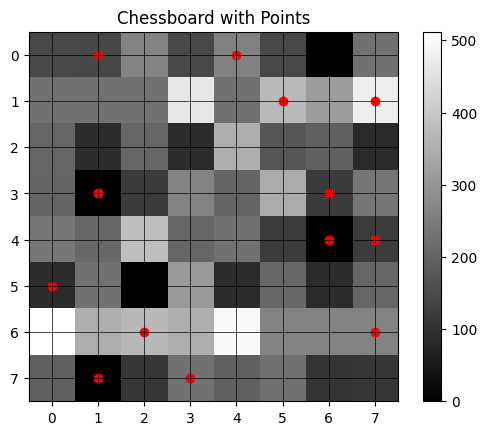

In [10]:
def intToBinary(num:int, pointsNumber:int) -> str:
    return bin(num)[2:].zfill(int(math.log2(pointsNumber)))

def binaryToInt(binaryStr:str) -> int:
    return int(binaryStr, 2)


def generateRandomBinaryPoints(pointsNumber:int) -> list[tuple[str, str]]:
    points = []
    for i in range(2 * pointsNumber):
        x = random.randint(0, pointsNumber -1)
        y = random.randint(0, pointsNumber -1)
        points.append((intToBinary(x,pointsNumber),intToBinary(y,pointsNumber)))
    return points

def calculateFitness(chessBoardPositions:list[tuple[str, str]], points:list[tuple], pointsNumber:int) -> int:
    fitness = 0
    for i in range(len(points)):
        x = binaryToInt(points[i][0])
        y = binaryToInt(points[i][1])
        if chessBoardPositions[x][y] == 0 or chessBoardPositions[x][y] == 1:
            fitness += 1
            chessBoardPositions[x][:] = chessBoardPositions[x][:] + 1 # Update the row
            chessBoardPositions[:][y] = chessBoardPositions[:][y] + 1 # Update the column
            for j in range(-min(x, y), min(pointsNumber - x, pointsNumber - y)):
                chessBoardPositions[x + j][y + j] += 1  # Update the main diagonal
            for k in range(-min(x, pointsNumber - y - 1), min(pointsNumber - x, y + 1)):
                chessBoardPositions[x + k][y - k] += 1  # Update the anti-diagonal
        
            chessBoardPositions[x][y] = chessBoardPositions[x][y] - 3    
        else:
           pass
    return fitness

def plotChessBoard(chessBoardPositions: np.ndarray, points: list[tuple[str, str]]) -> None:
    plt.imshow(chessBoardPositions, cmap='gray', interpolation='nearest')
    plt.colorbar()
    for point in points:
        x = binaryToInt(point[0])
        y = binaryToInt(point[1])
        plt.scatter(y, x, color='red')  # Note: x and y are swapped for correct orientation
    plt.title('Chessboard with Points')
    plt.grid(color='black', linestyle='-', linewidth=0.5)  # Add grid with black lines
    plt.gca().set_facecolor('white')  # Set background to white
    plt.show()



def calculateProbabilityOfIndividual(fitness:int, totalFitness:int) -> float:
    if totalFitness == 0:
        return 0
    return float(fitness) / float(totalFitness)


def geneticAlgorithm(chessBoardPositions:list[tuple[str,str]], pointsNumber:int, generations:int, mutationRate:float, solutionNumber:int) -> list[tuple[str, str]]:
  for _ in range(generations):
    totalFitness = 0
    individualsProbability = []
    individuals = []
    fitness = 0
    for _ in range(solutionNumber):
        points = generateRandomBinaryPoints(pointsNumber)
        fitness = calculateFitness(chessBoardPositions, points, pointsNumber)
        totalFitness += fitness
        individuals.append((points, fitness))
    individualsProbability = [
    (points, calculateProbabilityOfIndividual(fitness, totalFitness))
    for points, fitness in individuals
]
    newIndividuals = []
    for _ in range(solutionNumber):
          print("Individuals Probability:", individualsProbability)
          parent1 = random.choices(individuals, weights=[prob[1] for prob in individualsProbability])[0]
          parent2 = random.choices(individuals, weights=[prob[1] for prob in individualsProbability])[0]
          crossoverPoint = random.randint(0, 2 * pointsNumber - 1)
          child1 = parent1[0][:crossoverPoint] + parent2[0][crossoverPoint:]
          child2 = parent2[0][:crossoverPoint] + parent1[0][crossoverPoint:]
          if random.random() < mutationRate:
              mutationPoint = random.randint(0, 2* pointsNumber - 1)
              child1[mutationPoint] = (intToBinary(random.randint(0, pointsNumber - 1),pointsNumber), intToBinary(random.randint(0, pointsNumber - 1),pointsNumber))

          if random.random() < mutationRate:
              mutationPoint = random.randint(0, 2* pointsNumber - 1)
              child2[mutationPoint] = (intToBinary(random.randint(0, pointsNumber - 1),pointsNumber), intToBinary(random.randint(0, pointsNumber - 1),pointsNumber))

          
          fitnessChild1 = calculateFitness(chessBoardPositions, child1, pointsNumber)
          fitnessChild2 = calculateFitness(chessBoardPositions, child2, pointsNumber)

          newIndividuals.append((child1, fitnessChild1))
          newIndividuals.append((child2, fitnessChild2))
    individuals = newIndividuals
  return max(individuals, key=lambda x: x[1])[0]


if __name__ == "__main__":
    generations = 10
    mutationRate = 0.1
    solutionNumber = 10
    pointsNumber = 8 # Number of points on the chessboard

    chessBoardPositions = np.zeros((pointsNumber,pointsNumber), dtype=int)
    bestSolution = geneticAlgorithm(chessBoardPositions,pointsNumber, generations, mutationRate, solutionNumber)
    fitness = calculateFitness(chessBoardPositions, bestSolution, pointsNumber)
    print("Best Solution:", bestSolution)
    print("Fitness:", fitness)
    plotChessBoard(chessBoardPositions, bestSolution)